In [1]:
import numpy as np
import tensorflow as tf
import splitfolders
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, Flatten, Dense
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import os
import warnings
warnings.filterwarnings("ignore")

### Path of Data

In [2]:
data_path = r"C:\Users\ASUS\Desktop\read\project\animals\animals\animals"

### data Normalisation

In [3]:
data_gen = ImageDataGenerator(
    rescale=1. / 255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    validation_split=0.2
)

### Creating data generator

In [5]:
img_width, img_height = 200, 200
batch_size = 40

In [6]:
train_gen = data_gen.flow_from_directory(
    data_path,
    target_size=(img_width,img_height),
    batch_size=batch_size,
    class_mode= "categorical",
    subset='training'

)

Found 3916 images belonging to 82 classes.


In [7]:
val_gen = data_gen.flow_from_directory(
    data_path,
    target_size=(img_width,img_height),
    batch_size=batch_size,
    class_mode= "categorical",
    subset= 'validation'
)

Found 979 images belonging to 82 classes.


### Mapping the associates class indices with their corresponding class names

In [8]:
class_labels = train_gen.class_indices
class_names = {v: k for k, v in class_labels.items()}

In [9]:
class_names

{0: 'butterfly',
 1: 'cat',
 2: 'caterpillar',
 3: 'chimpanzee',
 4: 'cockroach',
 5: 'cow',
 6: 'coyote',
 7: 'crab',
 8: 'crow',
 9: 'deer',
 10: 'dog',
 11: 'dolphin',
 12: 'donkey',
 13: 'dragonfly',
 14: 'duck',
 15: 'eagle',
 16: 'elephant',
 17: 'flamingo',
 18: 'fly',
 19: 'fox',
 20: 'goat',
 21: 'goldfish',
 22: 'goose',
 23: 'gorilla',
 24: 'grasshopper',
 25: 'hamster',
 26: 'hare',
 27: 'hedgehog',
 28: 'hippopotamus',
 29: 'hornbill',
 30: 'horse',
 31: 'hummingbird',
 32: 'hyena',
 33: 'jellyfish',
 34: 'kangaroo',
 35: 'koala',
 36: 'ladybugs',
 37: 'leopard',
 38: 'lion',
 39: 'lizard',
 40: 'lobster',
 41: 'mosquito',
 42: 'moth',
 43: 'mouse',
 44: 'octopus',
 45: 'okapi',
 46: 'orangutan',
 47: 'otter',
 48: 'owl',
 49: 'ox',
 50: 'oyster',
 51: 'panda',
 52: 'parrot',
 53: 'pelecaniformes',
 54: 'penguin',
 55: 'pig',
 56: 'pigeon',
 57: 'porcupine',
 58: 'possum',
 59: 'raccoon',
 60: 'rat',
 61: 'reindeer',
 62: 'rhinoceros',
 63: 'sandpiper',
 64: 'seahorse',
 6

### Data Visualization

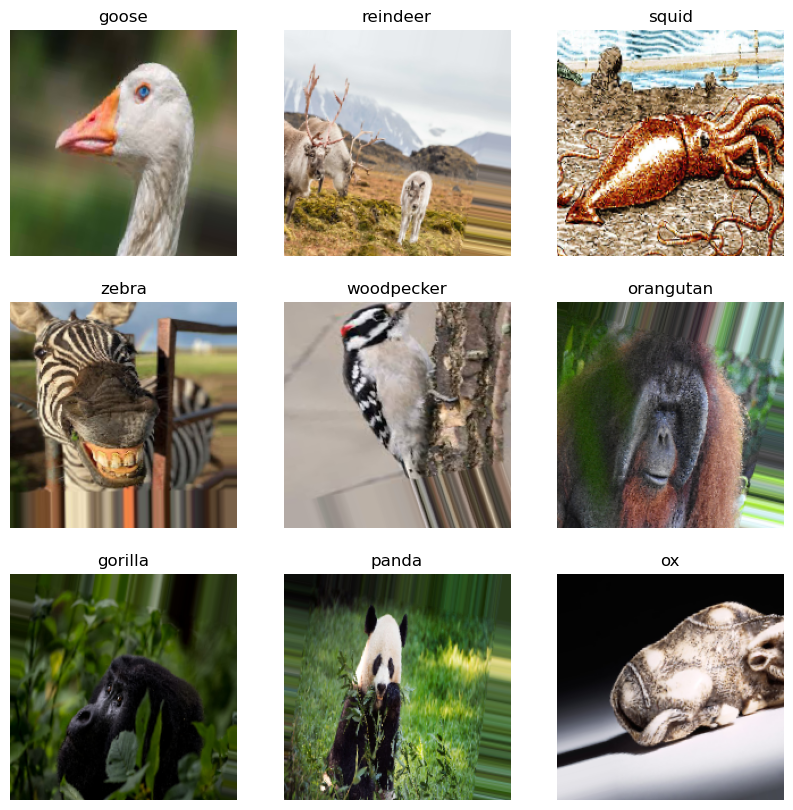

In [10]:
images, labels = train_gen.next()
plt.figure(figsize=(10, 10))
for i in range(9):
    plt.subplot(3, 3, i + 1)
    plt.imshow(images[i])
    plt.title(class_names[np.argmax(labels[i])])  # Assuming class_names is defined
    plt.axis("off")
plt.show()

### Model building

In [12]:
model = Sequential([
    Conv2D(32, (3,3),activation='relu', input_shape= (img_width,img_height,3)),
    MaxPool2D((2,2)),
    Conv2D(64, (3,3),activation='relu'),
    MaxPool2D((2,2)),
    Conv2D(128, (3,3),activation='relu'),
    MaxPool2D((2,2)),
    Conv2D(128, (3,3),activation='relu',),
    MaxPool2D((2,2)),
    Flatten(),
    Dense(512,activation="relu"),
    Dense(256,activation="relu"),
    Dense(82,activation="softmax")

])

### Model Complile

In [13]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

### Model data fitting 

In [14]:
history = model.fit(train_gen, epochs=20, validation_data=val_gen)

Epoch 1/20


98/98 [==============================] - 99s 998ms/step - loss: 4.3561 - accuracy: 0.0166 - val_loss: 4.2898 - val_accuracy: 0.0368
Epoch 2/20
98/98 [==============================] - 95s 966ms/step - loss: 4.1728 - accuracy: 0.0365 - val_loss: 4.1157 - val_accuracy: 0.0501
Epoch 3/20
98/98 [==============================] - 93s 952ms/step - loss: 4.0306 - accuracy: 0.0498 - val_loss: 4.0045 - val_accuracy: 0.0644
Epoch 4/20
98/98 [==============================] - 91s 931ms/step - loss: 3.9307 - accuracy: 0.0659 - val_loss: 3.9530 - val_accuracy: 0.0654
Epoch 5/20
98/98 [==============================] - 92s 941ms/step - loss: 3.8099 - accuracy: 0.0794 - val_loss: 3.8332 - val_accuracy: 0.0868
Epoch 6/20
98/98 [==============================] - 93s 944ms/step - loss: 3.7072 - accuracy: 0.0922 - val_loss: 3.7827 - val_accuracy: 0.0950
Epoch 7/20
98/98 [==============================] - 94s 958ms/step - loss: 3.6244 - accuracy: 0.1090 - val_loss: 3.6915 - val_accuracy: 0.11

### checking Accuracy and loss

In [15]:
eval_loss, eval_acc = model.evaluate_generator(val_gen)
print(f"Evaluation accuracy : {eval_acc}")
print(f"Evaluation loss : {eval_loss}")

Evaluation accuracy : 0.25025537610054016
Evaluation loss : 3.1353087425231934


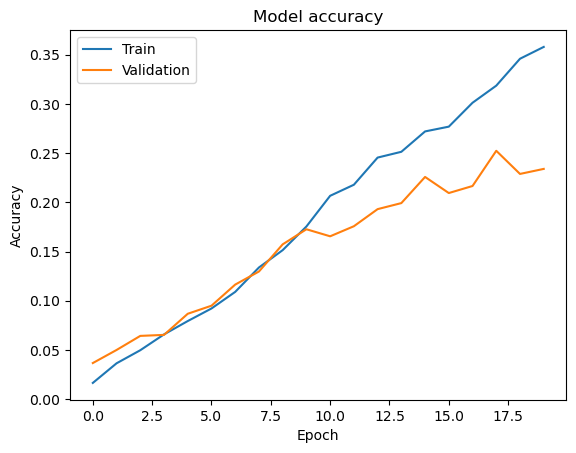

In [16]:
# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

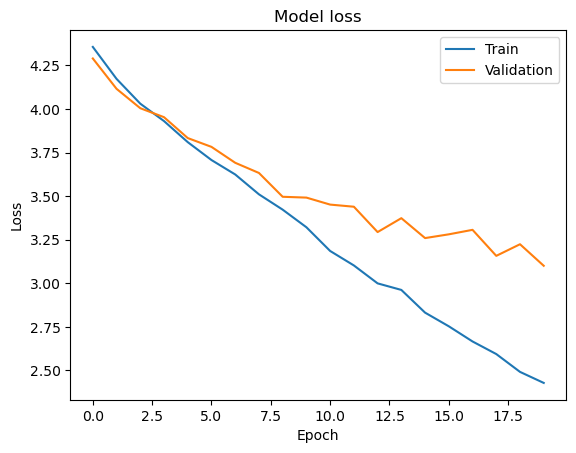

In [17]:
# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()

### Import tesorflow image for prediction of images

In [19]:
from tensorflow.keras.preprocessing import image

In [20]:
img_path_1 =r"C:\Users\ASUS\Desktop\read\project\6d713ab135.jpg"
img_path_2 =r"C:\Users\ASUS\Desktop\read\project\86c3e93ded.jpg"
img_path_3 =r"C:\Users\ASUS\Desktop\read\project\87fd3b8748.jpg"
img_path_4 =r"C:\Users\ASUS\Desktop\read\project\094ac674a9.jpg"

In [21]:
img_1 = image.load_img(img_path_1, target_size=(img_width, img_height))
img_2 = image.load_img(img_path_2, target_size=(img_width, img_height))
img_3 = image.load_img(img_path_3, target_size=(img_width, img_height))
img_4 = image.load_img(img_path_4, target_size=(img_width, img_height))

In [22]:
img1_arr = image.img_to_array(img_1)
img2_arr = image.img_to_array(img_2)
img3_arr = image.img_to_array(img_3)
img4_arr = image.img_to_array(img_4)

In [23]:
img1_arr = np.expand_dims(img1_arr, axis=0)
img2_arr = np.expand_dims(img2_arr, axis=0)
img3_arr = np.expand_dims(img3_arr, axis=0)
img4_arr = np.expand_dims(img4_arr, axis=0)

In [24]:
img1_arr = img1_arr / 255.0
img2_arr = img2_arr / 255.0
img3_arr = img3_arr / 255.0
img4_arr = img4_arr / 255.0

In [25]:
pred1 = model.predict(img1_arr)
pred2 = model.predict(img2_arr)
pred3 = model.predict(img3_arr)
pred4 = model.predict(img4_arr)

1/1 [==============================] - 0s 25ms/step


In [26]:
pred_class1 = np.argmax(pred1)
pred_class2 = np.argmax(pred2)
pred_class3 = np.argmax(pred3)
pred_class4 = np.argmax(pred4)

Text(0.5, 1.0, 'crow')

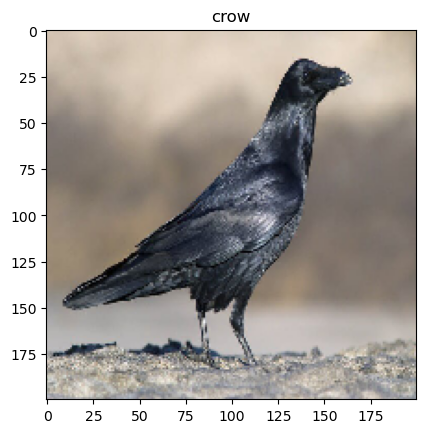

In [27]:
plt.imshow(img_1)
plt.title(class_names[pred_class1])

Text(0.5, 1.0, 'crow')

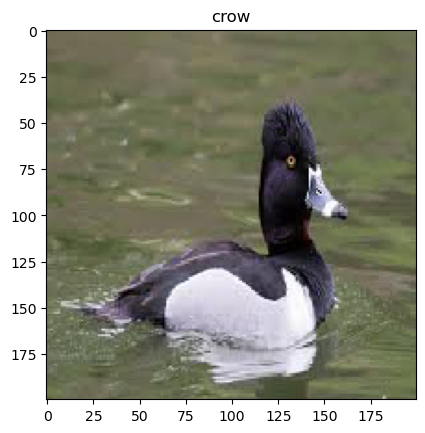

In [28]:
plt.imshow(img_2)
plt.title(class_names[pred_class2])

Text(0.5, 1.0, 'horse')

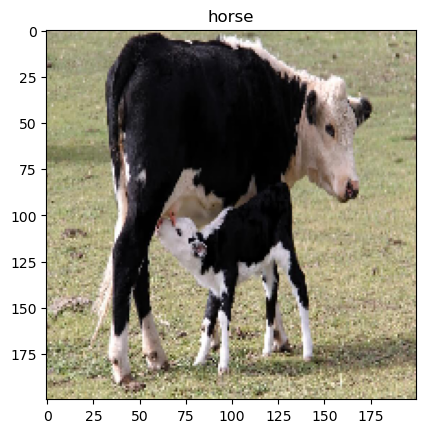

In [29]:
plt.imshow(img_3)
plt.title(class_names[pred_class3])

Text(0.5, 1.0, 'sandpiper')

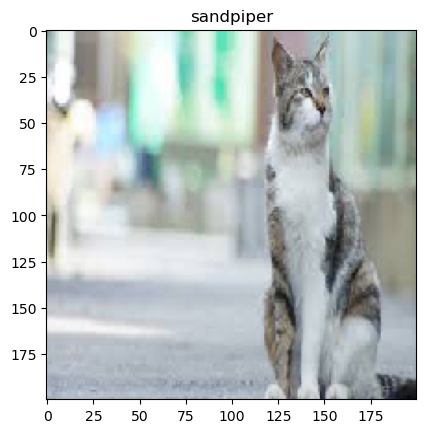

In [30]:
plt.imshow(img_4)
plt.title(class_names[pred_class4])